# Load Dataset

In [131]:
toy_datasets = '../datasets/toy_datasets/'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [132]:
import os
datasets = os.listdir(toy_datasets)

In [133]:
def load_and_plot(filename):
    data = pd.read_csv(filename)
    if data.shape[1] == 3:
        plt.scatter(data[data.columns[0]], data[data.columns[1]], c=data[data.columns[2]])
        plt.xlabel(data.columns[0])
        plt.ylabel(data.columns[1])
        plt.show()
    elif data.shape[1] == 4:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data[data.columns[0]], data[data.columns[1]], data[data.columns[2]], c=data[data.columns[3]], cmap='viridis')
        plt.show()
        plt.close()
        sns.pairplot(data, hue=data.columns[3])
        plt.show()

    return data

def get_dataset_file(dataset_number):
    for i in datasets:
        if i.startswith( "0" * (2- len(str(dataset_number))) +  str(dataset_number) + '_') and i.endswith('.csv'):
            return i
    return None


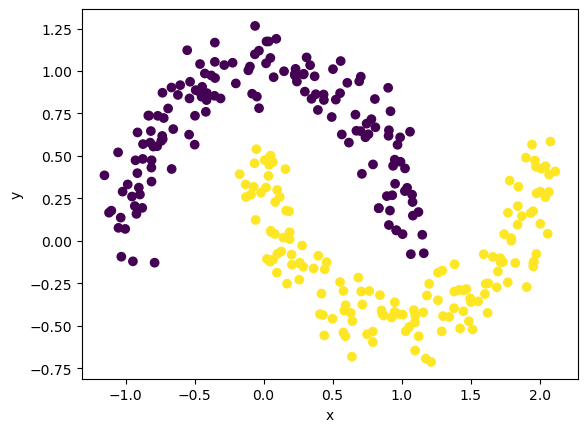

In [134]:
# dataset_number = np.random.randint(1, 27)
dataset_number = 1
df = load_and_plot(toy_datasets + get_dataset_file(dataset_number))

In [135]:
df.shape, df.columns 

((300, 3), Index(['x', 'y', 'target'], dtype='object'))

In [136]:
df.describe()

,x,y,target
count,300.000000,300.000000,300.000000
mean,0.496016,0.267627,0.500000
std,0.874739,0.505694,0.500835
min,-1.153824,-0.712161,0.000000
25%,-0.074982,-0.142784,0.000000
50%,0.500870,0.272982,0.500000
75%,1.090345,0.696797,1.000000
max,2.114142,1.265321,1.000000


# KNN Decision Boundary

In [147]:
X = df.drop(['target'] , axis= 1)
y = df['target']
X.shape, y.shape

((300, 2), (300,))

<Figure size 500x300 with 0 Axes>

<Axes: >

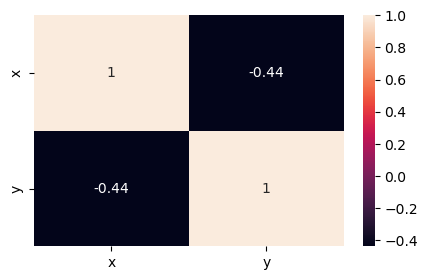

In [138]:
plt.figure(figsize=(5, 3))
sns.heatmap(X.corr(), annot=True)
plt.show()


In [139]:
X.shape, y.shape

((300, 2), (300,))

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

def decision_boundary(X, y, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X.values, y)

    x_min, x_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
    y_min, y_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = knn.predict(grid_points)
    Z = Z.reshape(xx.shape)


    plt.figure(figsize=(4, 3))
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])  
    cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

    _ = plt.contourf(xx, yy, Z, alpha=0.6, cmap=cmap_light)
    _ = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    _ = plt.title(f"k={k} K-Nearest Neighbors Decision Boundary")
    _ = plt.xlabel("Feature 1")
    _ = plt.ylabel("Feature 2")
    _ = plt.show()


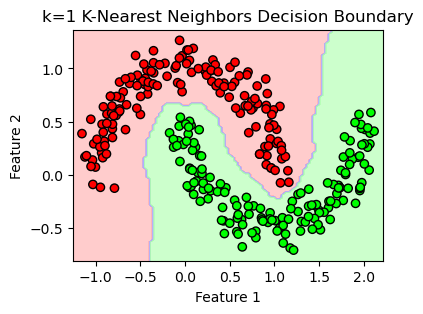

In [141]:
decision_boundary(X, y, 1)

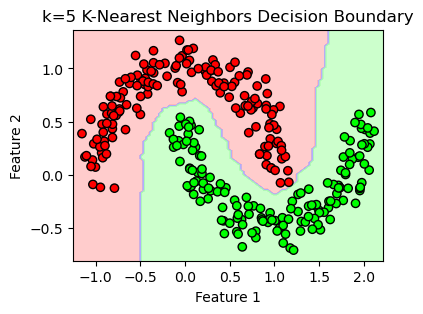

In [142]:
decision_boundary(X, y, 5)

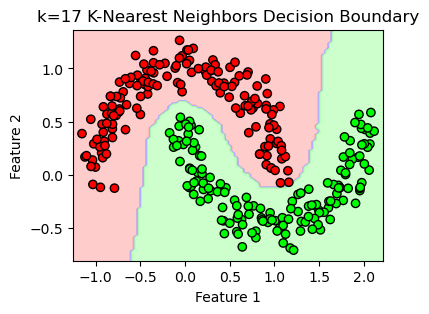

In [143]:
decision_boundary(X, y, 17)

In [144]:

def decision_boundary_plot_4(X, y):
    ks = [1, 5, 17, X.shape[0]//2]
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs = axs.ravel()
    for i, k in enumerate(ks):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X.values, y)

        x_min, x_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
        y_min, y_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                            np.linspace(y_min, y_max, 100))

        grid_points = np.c_[xx.ravel(), yy.ravel()]
        Z = knn.predict(grid_points)
        Z = Z.reshape(xx.shape)

        cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])  
        cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

        _ = axs[i].contourf(xx, yy, Z, alpha=0.6, cmap=cmap_light)
        _ = axs[i].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
        _ = axs[i].set_title(f"k={k} KNN Decision Boundary", fontsize=18)
        _ = axs[i].set_xlabel("Feature 1")
        _ = axs[i].set_ylabel("Feature 2")
    plt.tight_layout()
    plt.show()

## KNN 4 diff plots

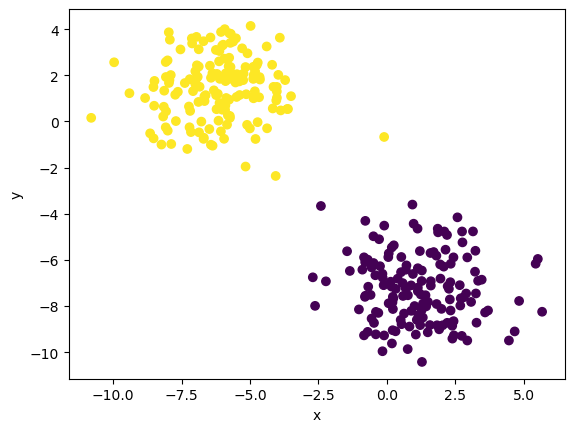

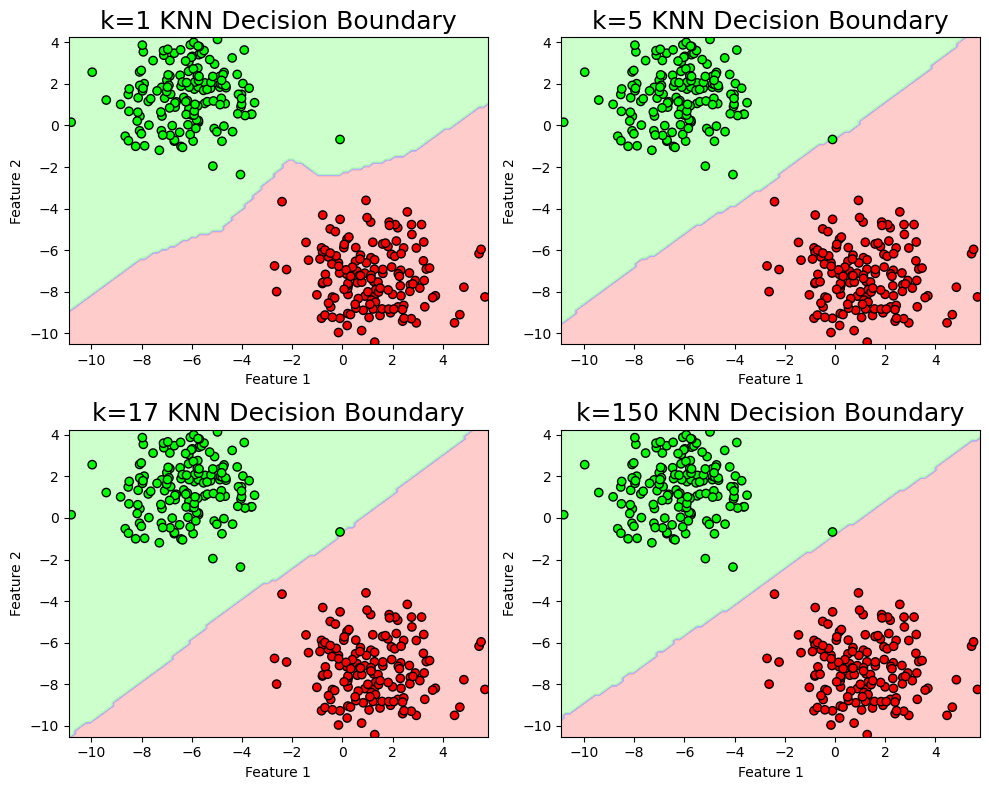

In [145]:
# dataset_number = np.random.randint(1, 27)
dataset_number += 1
df = load_and_plot(toy_datasets + get_dataset_file(dataset_number))
X = df.drop(['target'] , axis= 1)
y = df['target']
decision_boundary_plot_4(X, y)

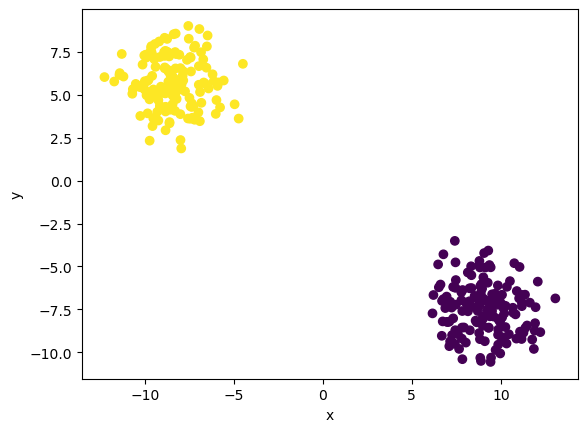

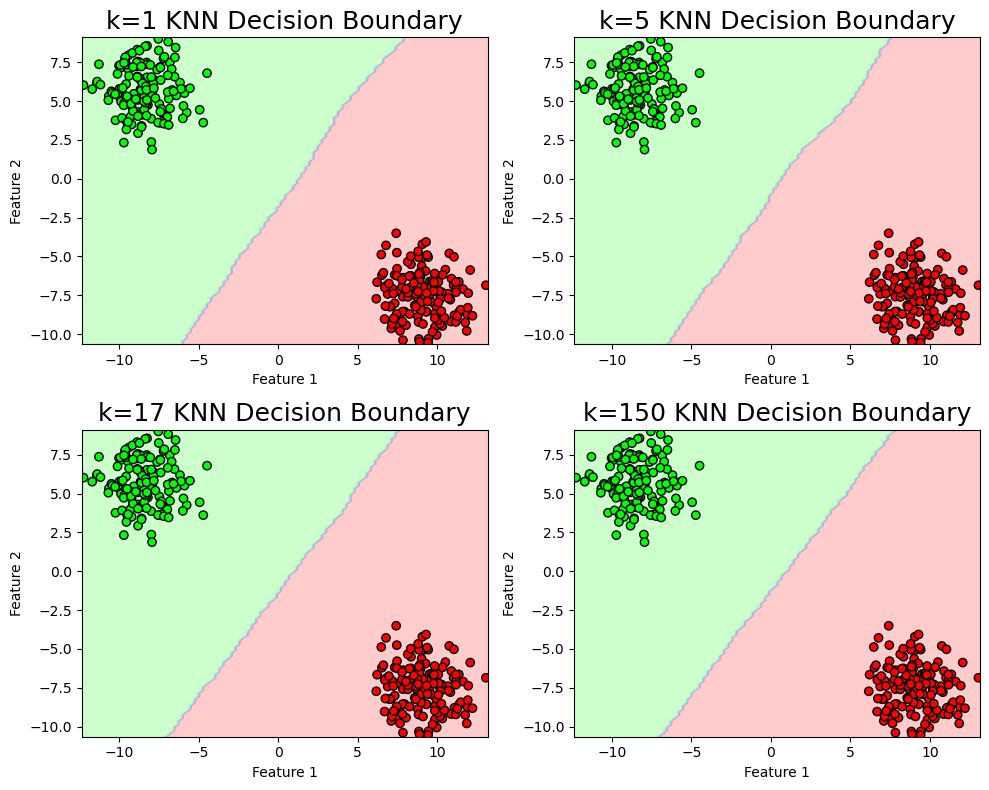

In [146]:
# dataset_number = np.random.randint(1, 27)
dataset_number += 1
df = load_and_plot(toy_datasets + get_dataset_file(dataset_number))
X = df.drop(['target'] , axis= 1)
y = df['target']
decision_boundary_plot_4(X, y)